In [115]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# To start the analysis lets load the dataset ("train.csv") and store it in titanic DataFrame object to work with.
titanic=pd.read_csv("train.csv")

In [7]:
# Lets take a sneak peek of how the dataset looks like...
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Question 1 : Starting with looking at the passengers on Titanic Ship(the distribution of their Age,Gender,Class etc)..

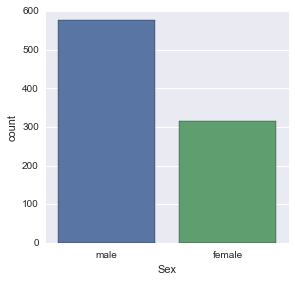

In [127]:
# check out the male and female passengers 
sns.factorplot("Sex",data=titanic,kind="count")

Quite many male passengers!!

In [11]:
# we can also look at the contingency table through crosstab function of pandas
pd.crosstab(titanic.Sex,titanic_df.Pclass,margins=False)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


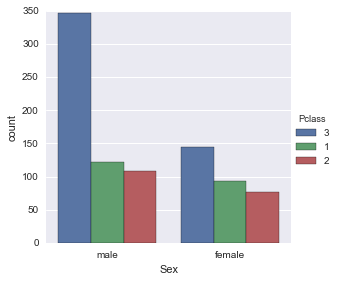

In [12]:
# Now lets look at male and female ratio in different classes
sns.factorplot("Sex",hue="Pclass",data=titanic,kind="count")

Interesting to see the number of men in the 3rd class...

In [13]:
# Nextly,add a new column "Person" to identify passengers as male , female or child depending on their Age. 

# function to identify child depending on their Age
def male_female_child(passenger):
    Age,Sex=passenger
    # if age is less than 16, return as child else return the sex
    if Age < 16:
      return "child"
    else :
      return Sex 
    
# Add the new Column "Person" through apply technique
titanic["Person"]=titanic[["Age","Sex"]].apply(male_female_child,axis=1)

In [14]:
# Looking at the first few rows of the dataset again...
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


In [15]:
# Check out the quick overall numbers of male , female and children on the titanic ship
titanic["Person"].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

By the numbers we see highest number of males on the ship....

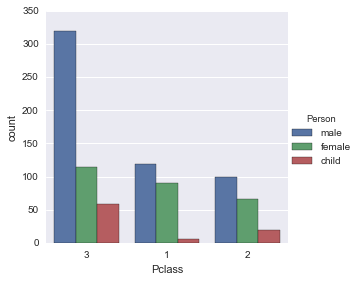

In [16]:
# Look at the different levels of Person Column (male,female and child) in different class
sns.factorplot("Pclass",data=titanic,hue="Person",kind="count")

Woah !!! Look at the numbers in the third class. The number of children were highest in the third class.

In [17]:
pd.crosstab(titanic.Person,titanic.Pclass)

Pclass,1,2,3
Person,,,
child,6,19,58
female,91,66,114
male,119,99,319


Even the above contingency table shows highest number of passengers (male,female and child) in the third class.

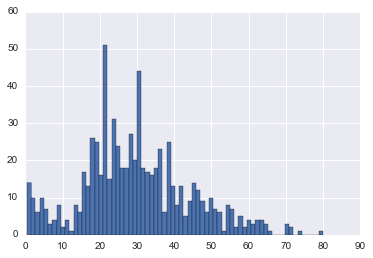

In [18]:
# Looking at the above numbers, lets plot a histogram using pandas to see the Age distribution.
titanic["Age"].hist(bins=70)

In [19]:
titanic["Age"].mean()

29.69911764705882

Looks like the mean age of the passengers on the ship was 29 to 30 years.


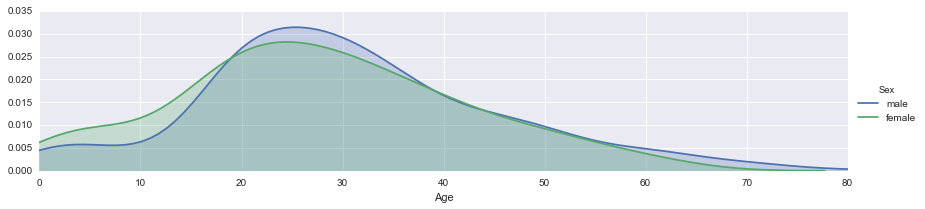

In [20]:
# Lets visualize the data in another way by using Facetgrid to plot multiple Kdeplots 

# set the fig as the FacetGrid object and provide the pandas DataFrame titanic_df as the datasource and Sex as hue.
# Also set the aspect ratio to 4
fig=sns.FacetGrid(titanic,hue="Sex",aspect=4)

# Now plot the multiple kdeplots(male and female) for Age 
fig.map(sns.kdeplot,"Age",shade=True)

# get the oldest person on the ship by finding out the max age
oldest=titanic["Age"].max()

# Set the xlim from 0 to the oldest age , as none passenger's age can be negative
fig.set(xlim=(0,oldest))

#Add the legend
fig.add_legend()

The above graph shows the kdeplots for the ages of male and female passengers.


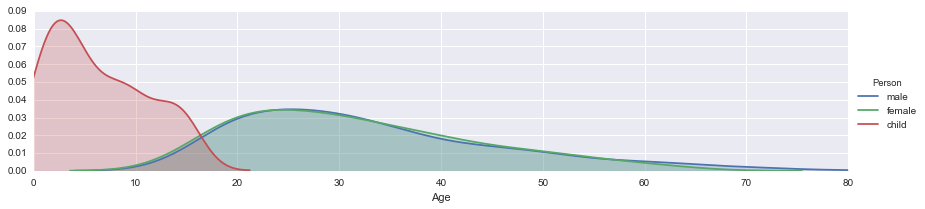

In [21]:
# Also lets include the child as well in the kdeplots by using Person column as the hue.
# It will show the Age distribution of children as well.

fig=sns.FacetGrid(titanic,hue="Person",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=titanic["Age"].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

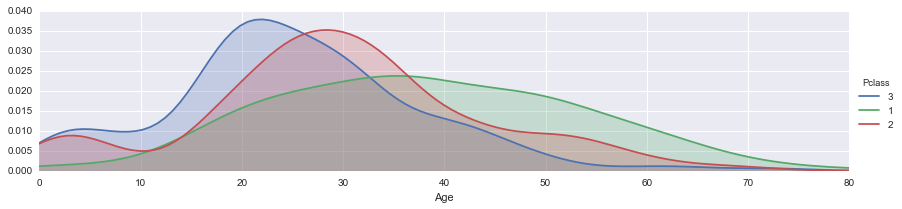

In [22]:
# Again changing the hue argument for Pclass to look at the Age distribution in different classes.

fig=sns.FacetGrid(titanic,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=titanic["Age"].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

Looking at the above plot we can say that the 1st class has a normal distribution , but the 2nd and 3rd class are definitely skewed to the right . The 2nd and 3rd class have more passengers between 20 to 30 range which in parallel with the fact that the mean age of the passengers is around 30.

Moving on to the next question ...
Question 2 : Look at the distribution of passengers on the different decks of the ship and the relation between the class of the passengers and the deck they were on??

In [23]:
# Dropping the nan values in the Cabin column of the dataset.
deck=titanic["Cabin"].dropna()

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [133]:
# Getting the first letter of the deck level with a for loop
levels=[]

for level in deck:
    levels.append(level[0])
    
    
cabin_df=DataFrame(levels)
cabin_df.columns=["Cabin"]

#sorting the values
cabin_df.sort_values("Cabin",inplace=True)

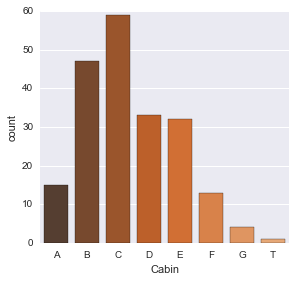

In [135]:
#Plotting the factorplot to see the distribution of passengers on different decks of the ship..
sns.factorplot("Cabin",data=cabin_df,kind="count",palette="Oranges_d")

In [30]:
# Removing the "T" value from the cabin's list which does not make sense.
cabin_df=cabin_df[cabin_df.Cabin!="T"]

In [31]:
cabin_df["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Cabin, dtype: int64

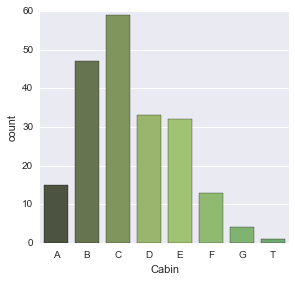

In [137]:
sns.factorplot("Cabin",data=cabin_df,kind="count",palette="summer_d")

From the above distribution we can see that Deck "C" had the highest no. of passengers....

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


Lets explore the next Question 3: Where did the passengers come from ?? Southampton, Queenstown or Cherbourg??

In [34]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

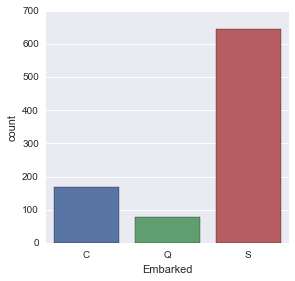

In [35]:
sns.factorplot("Embarked",data=titanic,kind="count",order=["C","Q","S"])

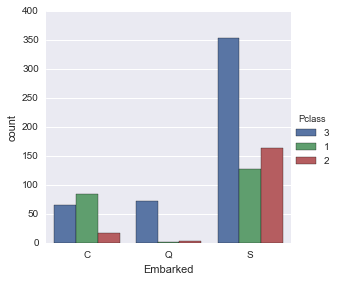

In [36]:
sns.factorplot("Embarked",data=titanic,hue="Pclass",kind="count",order=["C","Q","S"])

From the above plot we can see that, in Queenstown almost all the passengers boarded in the 3rd class. It would be interesting to further investigate the socio economics of Queenstown in that time period.

The next question is ... Question 3 : How many passengers were alone and how many with their family??

In [82]:
## Adding a new column "Alone" to the dataset which contains the sum of parent/child and sibsp column

titanic["Alone"]=titanic.Parch + titanic.SibSp

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


In [84]:
## Setting the Values in "Alone" column to "With Family" if the value is >=1.
titanic["Alone"].loc[titanic["Alone"] >=1 ] = "With Family"

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


In [86]:
## Setting the Values in "Alone" column to "Without Family" if the value is =0.
titanic["Alone"].loc[titanic["Alone"] == 0] = "Without Family"

In [87]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Without Family


In [90]:
# Looking at the counts of the passengers with family and without family.
titanic["Alone"].value_counts()

Without Family    537
With Family       354
Name: Alone, dtype: int64

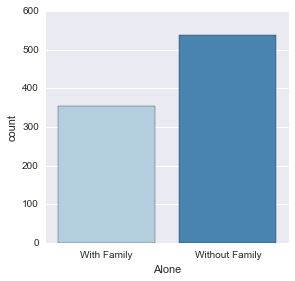

In [91]:
# Lets have a visual of the passengers with family and without family.
sns.factorplot("Alone",data=titanic,kind="count",palette="Blues")

Further analysis of the titanic dataset leads to the next question ..... Question 4 : What lead some passengers to survive the disaster??

In [92]:
## Looking at the numbers of those who survived(1) and died(0).
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [93]:
# To add a new column "Survivor" , lets start my setting the values to yes and no through mapping
Survival={0:"no",1:"yes"}

In [96]:
# Adding the new column "Survivor". It contains "yes" for passengers who survied and "no" for passengers who died.
titanic["Survivor"]=titanic["Survived"].map(Survival)

In [97]:
#Lets take a sneak peek at the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Without Family,no


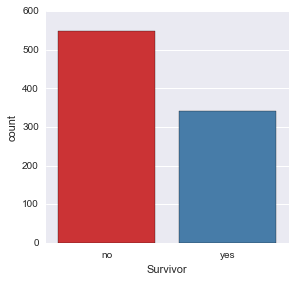

In [98]:
# Also lets have a visual on the survival rate
sns.factorplot("Survivor",data=titanic,palette="Set1",kind="count")

In [100]:
# The following value counts are in confirmity with the above plot
titanic["Survivor"].value_counts()

no     549
yes    342
Name: Survivor, dtype: int64

The above statistics show that there were quite a large no. of deaths...
Lets investigate if there is any relation between the class of the passengers and their survival rate.



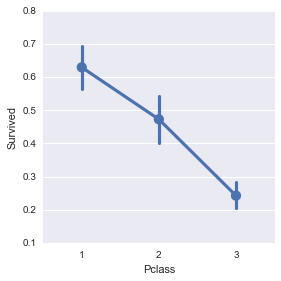

In [104]:
# Visualizing the factor plot again for the passengers who survied and their class
sns.factorplot(x="Pclass",y="Survived",data=titanic,order=[1,2,3])

The above plot shows that the survival rate was quite very low in the 3rd class.

The following plot also confirms the same statistics about the survival rate in the 3rd class being very low as compared to the 1st and the 2nd class.

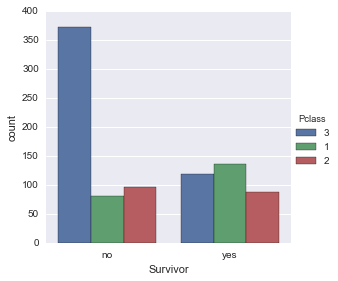

In [110]:
sns.factorplot("Survivor",hue="Pclass",data=titanic,kind="count")

But were there large no. of male passengers in the 3rd class.Lets delve further to look at the gender ....


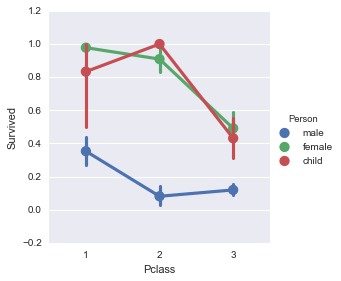

In [114]:
sns.factorplot("Pclass","Survived",hue="Person",data=titanic,order=[1,2,3])

From the data, it looks like male passengers were the ones who died the most(no. of male passengers were the least survivors in all the classes 1,2,3)....WOMEN AND CHILDREN FIRST POLICY !!!

Lets look at the age factor as well.....


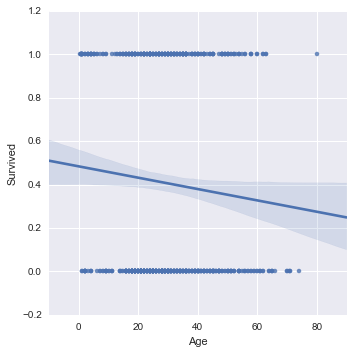

In [122]:
#Lets plot a linear regression plot to analyse the relationship between the age of the passengers and the chances of their survival. 
sns.lmplot("Age","Survived",data=titanic)

The above visual shows that the likelihood of the survival decreased as the age of the passengers increased...i.e the older 
passengers were less likley to have survive as compared to younger passengers.

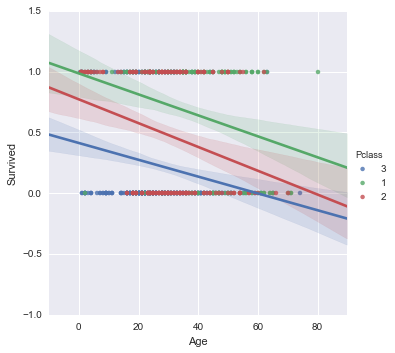

In [118]:
# Lets try to find out how did the combination of factors (class and Age) effect the survival rate of the passengers.
sns.lmplot("Age","Survived",hue="Pclass",data=titanic)

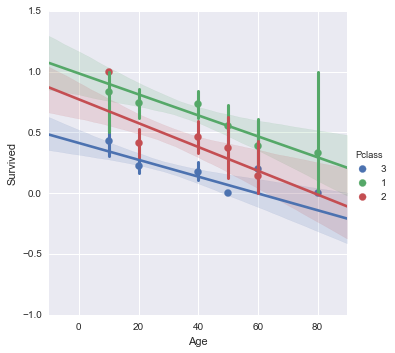

In [124]:
agegroups=[10,20,40,50,60,80]
sns.lmplot("Age","Survived",hue="Pclass",data=titanic,x_bins=agegroups)

So, we have an interesting insights on the older 1st class passengers as well.So, the Age factor did have considerable 
effect on the lesser likelihood of the survival. 

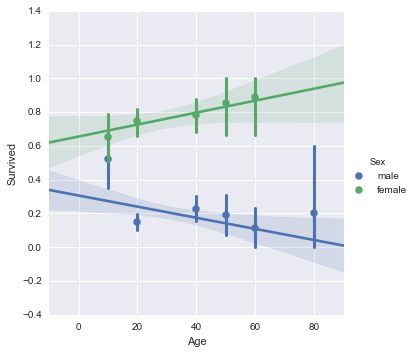

In [126]:
# Lets consider the Gender effect....
sns.lmplot("Age","Survived",hue="Sex",data=titanic,x_bins=agegroups)

Looks like , the older female passengers had better chances of surviving than older males...
So, the above analysis until now elucidates that how gender(male) , age(older) and class(3rd class) all relate to the 
lesser likelihood of survival of the passengers....

In [145]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Without Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Without Family,no


After the above analysis...lets check further if passengers with family had any luck of survival ??
Does the fact that passengers with family(who had someone to help them get into life boats) relate to their higher likelihood of survival ??

Or, the passengers who had no family were better off and had higher survival rate as they just had to save themselves and
not worry about their parents, spouse or kids??

                                    

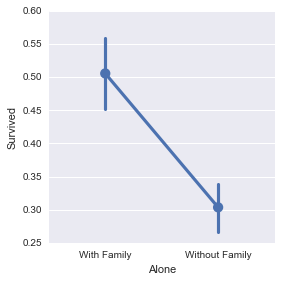

In [146]:
#Lets do a factorplot to check how survival rate and having family relate to each other....
sns.factorplot("Alone","Survived",data=titanic)

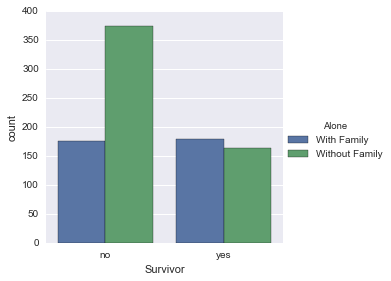

In [149]:
sns.factorplot("Survivor",hue="Alone",data=titanic,kind="count")

The above two factor plots say that the passengers with family had higher rate of survival ....
Also, we can observe that there were quite large no. passengers without family who did not survive the sinking.